First few rows of the dataset:
   Home     Price    Size  Number of Rooms location
0     1  114300.0  1790.0              2.0    urban
1     2  114200.0  2030.0              4.0    urban
2     3  114800.0  1740.0              3.0    urban
3     4   94700.0  1980.0              3.0    urban
4     5  119800.0  2130.0              3.0    urban
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Home             128 non-null    int64  
 1   Price            123 non-null    float64
 2   Size             123 non-null    float64
 3   Number of Rooms  126 non-null    float64
 4   location         123 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 5.1+ KB
None

Descriptive statistics for numerical columns:
             Home          Price         Size  Number of Rooms
count  128.000000     123.000000   123.000000        1

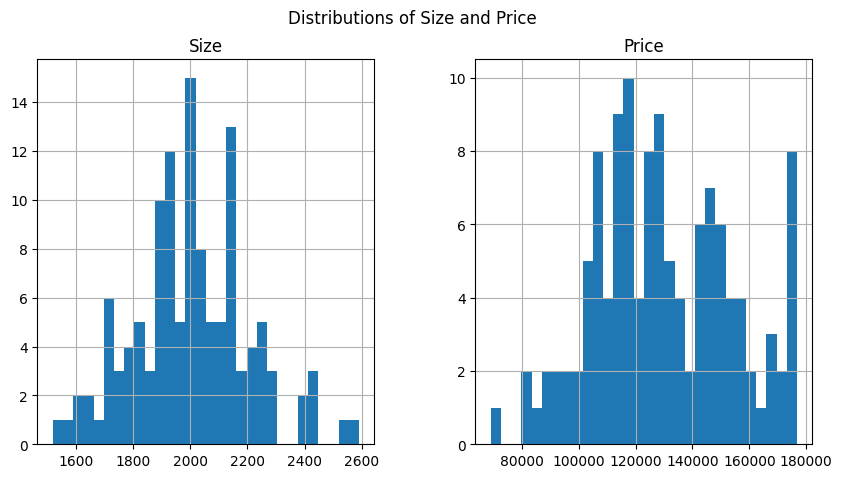

Non-numeric columns: Index(['location'], dtype='object')
Dataset after encoding:
   Home     Price    Size  Number of Rooms  location_suburban  location_urban
0     1  114300.0  1790.0              2.0              False            True
1     2  114200.0  2030.0              4.0              False            True
2     3  114800.0  1740.0              3.0              False            True
3     4   94700.0  1980.0              3.0              False            True
4     5  119800.0  2130.0              3.0              False            True
Data types after encoding:
Home                   int64
Price                float64
Size                 float64
Number of Rooms      float64
location_suburban       bool
location_urban          bool
dtype: object
Missing values in the dataset:
Home                 0
Price                0
Size                 0
Number of Rooms      0
location_suburban    0
location_urban       0
dtype: int64


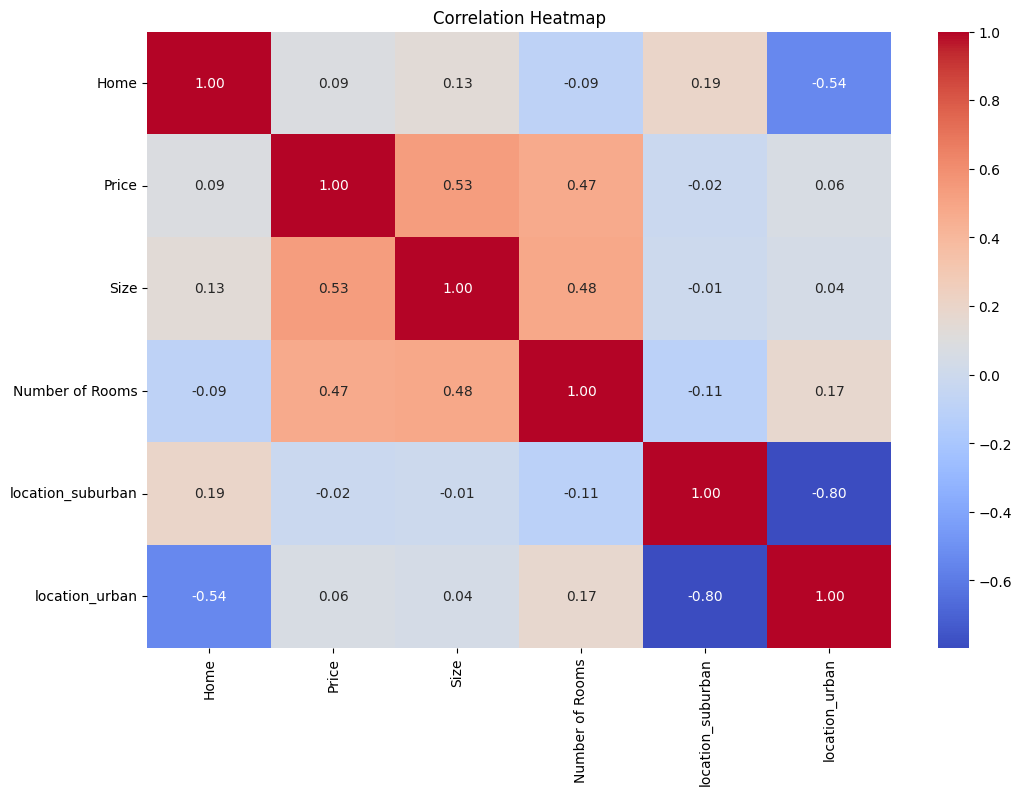

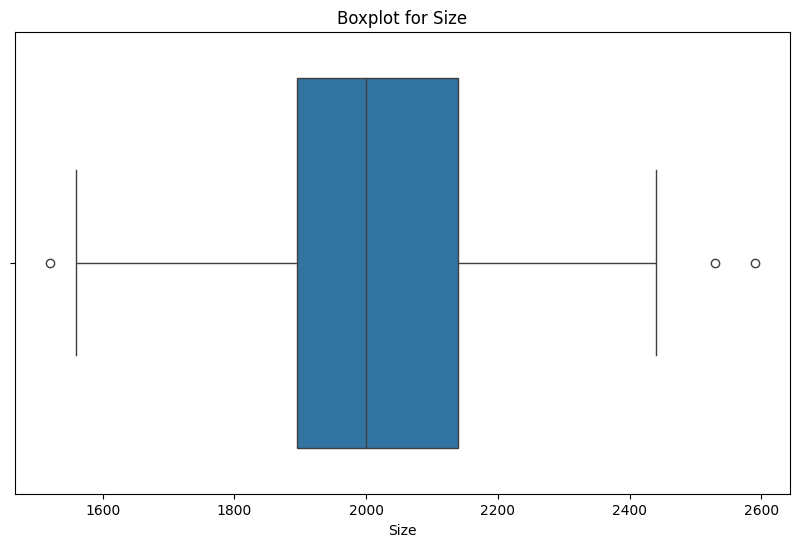

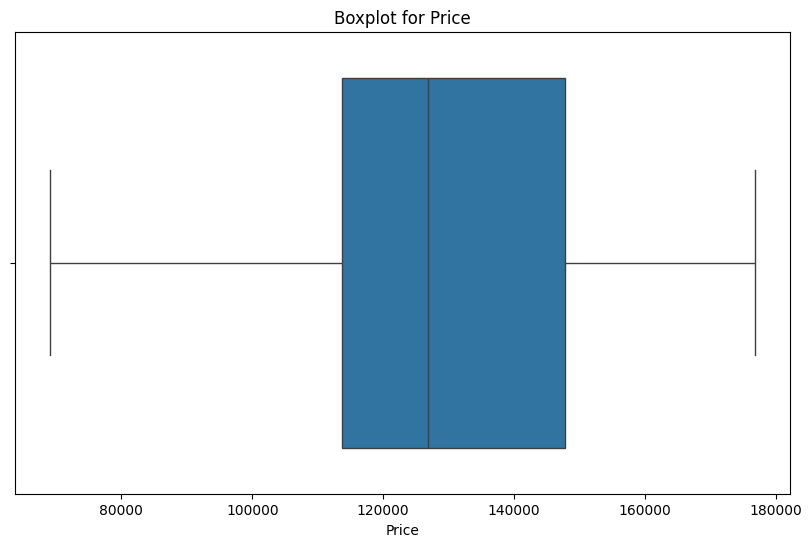


Scaled data:
       Size  Number of Rooms
0 -1.048705        -1.408547
1  0.131538         1.431638
2 -1.294589         0.011545
3 -0.114346         0.011545
4  0.623306         0.011545
Columns in the dataset: Index(['Home', 'Price', 'Size', 'Number of Rooms', 'location_suburban',
       'location_urban'],
      dtype='object')

Correlation Matrix:
Price                1.000000
Size                 0.534696
Number of Rooms      0.468489
Home                 0.087771
location_urban       0.062111
location_suburban   -0.019049
Name: Price, dtype: float64


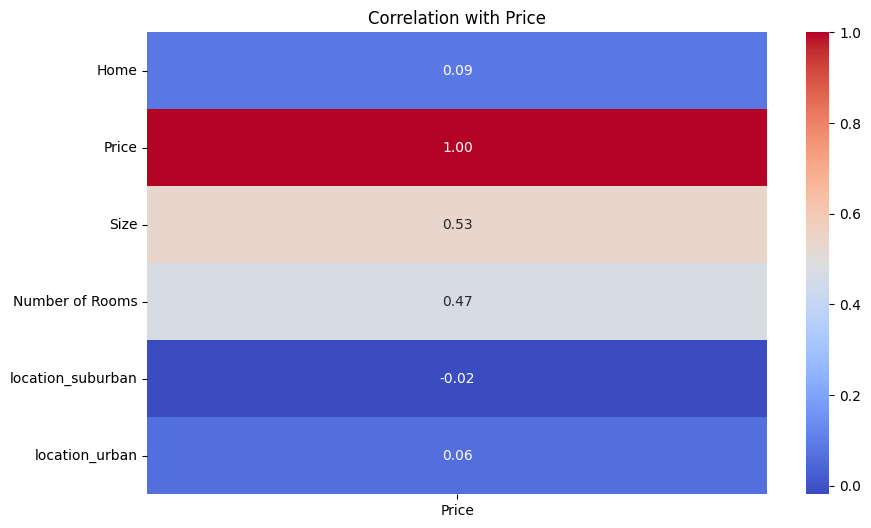

Training set size: 98, Test set size: 25

Model coefficients:
[   99.11298219 10159.69877636  6999.13084741  7305.71449116
  7068.14321213]
Model intercept:
117669.57818740795
RMSE: 20991.701028044943
R² Score: 0.057199340947643784


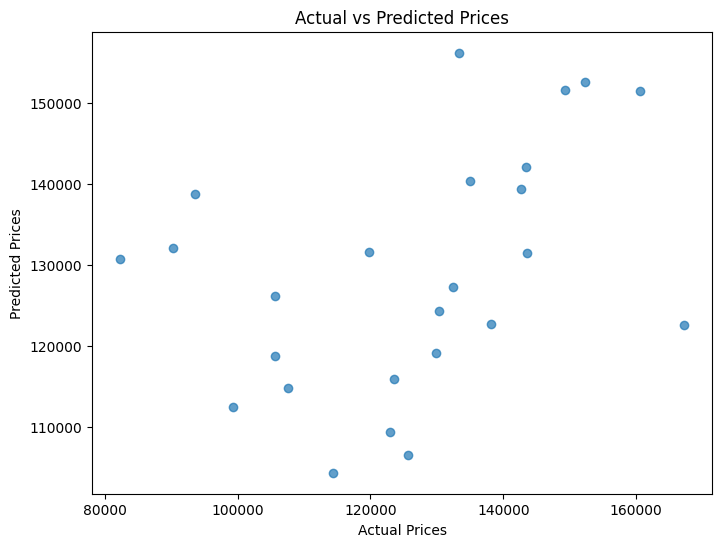

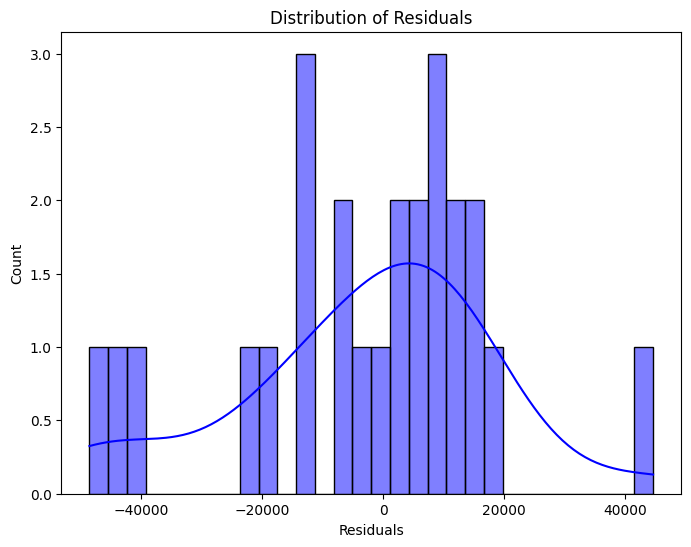


Feature importance (based on coefficients):
             Feature   Coefficient
1               Size  10159.698776
3  location_suburban   7305.714491
4     location_urban   7068.143212
2    Number of Rooms   6999.130847
0               Home     99.112982


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load Dataset
df = pd.read_csv("house_prices.csv")

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Data Exploration
print(df.info())
print("\nDescriptive statistics for numerical columns:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Handling Missing Values
df = df.dropna()

# handle outliners 
upper_limit = df['Price'].quantile(0.95)
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])

# Visualize the distributions of numerical columns
df[['Size', 'Price']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distributions of Size and Price')
plt.show()

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# One-Hot Encoding for categorical variables like 'Location'
df = pd.get_dummies(df, columns=['location'], drop_first=True)
print("Dataset after encoding:")
print(df.head())

# Label Encoding for binary columns like 'Yes'/'No'
# Assuming you have a column 'Is_Ready' with 'Yes'/'No'
if 'Is_Ready' in df.columns:
    df['Is_Ready'] = df['Is_Ready'].map({'Yes': 1, 'No': 0})

# Check again if all columns are numeric
print(f"Data types after encoding:\n{df.dtypes}")
# Check for missing values
print(f"Missing values in the dataset:\n{df.isnull().sum()}")

# Generate the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add title and show plot
plt.title('Correlation Heatmap')
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Size'])
plt.title('Boxplot for Size')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot for Price')
plt.show()

# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical features
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# Check the scaled data
print("\nScaled data:")
print(df[['Size', 'Number of Rooms']].head())

# Print the column names to verify the exact name of 'Location'
print(f"Columns in the dataset: {df.columns}")

# Correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix['Price'].sort_values(ascending=False))

#  Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Price')
plt.show()

# Define Preprocessing Pipeline
num_features = ['Size', 'Number of Rooms']
cat_features = ['location']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


# Separate features (X) and target (y)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable (Price)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Model Training
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Output the model coefficients
print("\nModel coefficients:")
print(model.coef_)

# Output the model intercept
print("Model intercept:")
print(model.intercept_)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

#Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

#Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

# Display the coefficients and feature names
feature_names = X.columns
coefficients = model.coef_

# Combine features with their respective coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("\nFeature importance (based on coefficients):")
print(feature_importance)